# ***Time Series Analysis***
---
---

## *> Imports*
---

In [1]:
import pandas as pd

## *> Datetime*
___

In [5]:
# Unformatted datetime
data = pd.DataFrame({'Value': ['100','78','129'],\
                     'Date':['02/20/2016', '01/15/2015', '08/21/2015']})
print(data)

print('---------')

# Formatted datetime
data['Date'] = pd.to_datetime(data['Date'])
print(data)

  Value        Date
0   100  02/20/2016
1    78  01/15/2015
2   129  08/21/2015
---------
  Value       Date
0   100 2016-02-20
1    78 2015-01-15
2   129 2015-08-21


## *> Activity: Obtain the trend and seasonality for air passenger dataset*
---


+ **Step One:** Plot the number of passenger based on Month: Hint:

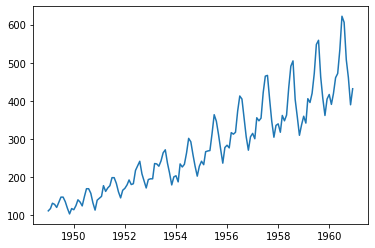

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# read the data in
# Convert the month column to pandas datetime format
df = pd.read_csv('../data/AirPassengers.txt')
df['Month'] = pd.to_datetime(df['Month'])

# plot passengers per month
plt.plot(df['Month'], df['#Passengers'])
plt.show()

+ **Step 2-4:**
    + 2- Set the index of data frame by Month: df = df.set_index(['Month'])
    + 3- Apply the decomposition to data-frame -> Give us trend and seasonality import statsmodels.api as sm decomposition = sm.tsa.seasonal_decompose(df, model='additive') 
    + 4- Plot trend, seasonality and residual for passenger dataset



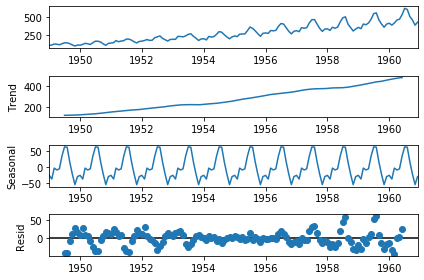

In [21]:
import statsmodels.api as sm

# Load and plot passaenger time series
df = pd.read_csv('../data/AirPassengers.txt')
df['Month'] = pd.to_datetime(df['Month'])

# Apply decompostion analysis to the time series
df  = df.set_index(['Month'])
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
decomposition.plot()
plt.show()

## *> Sampling and Smoothing*
---
+ Plot the "Close", which is stock market price at closing time (5:30 p.m. NY time), its sampled version and its smoothed version. 

+ **Steps:**
    + 1- Load and plot Apple Stock Market dataset

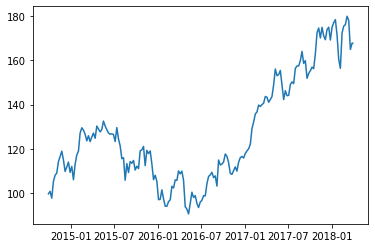

In [25]:
import pandas as pd
data = pd.read_csv('../data/AAPL.txt')
data['Date'] = pd.to_datetime(data['Date'])
data['Tick'] = range(0, len(data))
plt.plot(data['Date'], data['Close'])
plt.show()

+ **Steps:**
    + 2- Sample this dataset and plot it: Hint: use `data.sample()`
    + 3- Smooth this time series ("Close"): Hint: use `data['Close'].rolling(window=5).mean()`



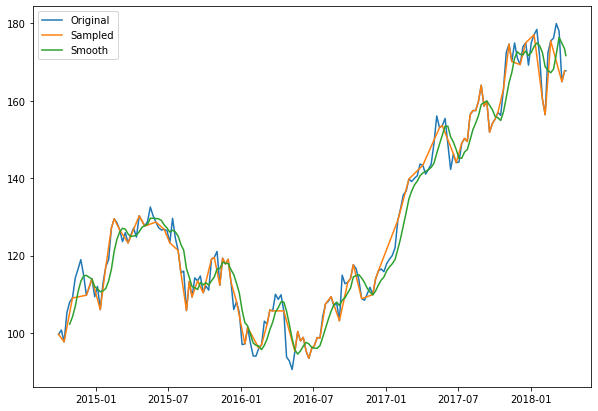

In [35]:
plt.figure(figsize=(10,7))


data = pd.read_csv('../data/AAPL.txt')
data['Date'] = pd.to_datetime(data['Date'])
data['Tick'] = range(0, len(data))
plt.plot(data['Date'], data['Close'], label='Original')


# Sample time series
data_one_tenth = data.sample(frac=0.5)  # 50% sample set
data_one_tenth = data_one_tenth.sort_values(by=['Tick'])
plt.plot(data_one_tenth['Date'], data_one_tenth['Close'], label='Sampled')


# Smooth the dataset
data['Rolling_Mean']  = data['Close'].rolling(window=5).mean()
plt.plot(data['Date'], data['Rolling_Mean'], label='Smooth')


# plot them all
plt.legend()
plt.show()

## ***> QUANDL***
---
---
https://www.quandl.com/

In [38]:
import quandl
import numpy as np

quandl.ApiConfig.api_key = '[API KEY]'     # quandl.ApiConfig.api_key = settings.QUANDL_KEY 
#get quandl data
aapl_table = quandl.get('WIKI/AAPL')
aapl_table.to_pickle('apple_quandl.pkl')
# aapl_table.head()
aapl = aapl_table.loc['2017-3',['Open','Close']]

# From compund rate of return formula
aapl['log_price'] = np.log(aapl['Close'])
x = np.diff(aapl['log_price'])
print(aapl)
print(x.sum()*100)

# Another way to compute the montly return
returns = aapl['Close'].pct_change()
print(returns.sum()*100)
print(np.log(143.66/139.79)*100)

               Open   Close  log_price
Date                                  
2017-03-01  137.890  139.79   4.940141
2017-03-02  140.000  138.96   4.934186
2017-03-03  138.780  139.78   4.940070
2017-03-06  139.365  139.34   4.936917
2017-03-07  139.060  139.52   4.938208
2017-03-08  138.950  139.00   4.934474
2017-03-09  138.740  138.68   4.932169
2017-03-10  139.250  139.14   4.935481
2017-03-13  138.850  139.20   4.935912
2017-03-14  139.300  138.99   4.934402
2017-03-15  139.410  140.46   4.944923
2017-03-16  140.720  140.69   4.946559
2017-03-17  141.000  139.99   4.941571
2017-03-20  140.400  141.46   4.952017
2017-03-21  142.110  139.84   4.940499
2017-03-22  139.845  141.42   4.951734
2017-03-23  141.260  140.92   4.948192
2017-03-24  141.500  140.64   4.946203
2017-03-27  139.390  140.88   4.947908
2017-03-28  140.910  143.80   4.968423
2017-03-29  143.680  144.12   4.970646
2017-03-30  144.190  143.93   4.969327
2017-03-31  143.720  143.66   4.967449
2.73081001636184
2.784543